<a href="https://colab.research.google.com/github/pe44enka/WordCloud/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Word Cloud**

![](https://marvel-b1-cdn.bc0a.com/f00000000026007/resilienteducator.com/wp-content/uploads/2015/09/Revising-With-Pictures-How-Word-Clouds-Help-Students-Become-Better-Writers.jpg)


### Objectives
Can you guess a poem or a novel just by looking at most frequent words in it? Or maybe its genre at least? Let's give it a try!

A *Word Cloud* is an image that's made up of different sized words. Usually the sizes of the words are determined by how many times each word appears in a specific text.

---

### Goal of the project
To create a Word Cloud of the most frequently used words in a given text.

### Data
[Wuthering Heights by Emily Brontë](https://www.gutenberg.org/files/768/768-0.txt) available as part of [Project Gutenberg](https://www.gutenberg.org)

### Libraries
* **Data scraping:** urllib
* **Data processing:** nltk
* **Libraries:** wordcloud
* **Word cloud vizualization:** matplotlib 


---

# Load Libraries

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import urllib
import wordcloud
from matplotlib import pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Text Cleaning


To build the Word Cloud we need to collect frequency of appearance of each word in the text.

But before starting counting frequencies we need to clean the text we got. To be more specific, we need get rid of punctuation, stop words and pay attention to  the case of the letters.

For this purpose we will create 2 variables: 
1. string with possible punctuation marks
2. list of stop words which we get from *nltk* library and extend it with custom words




---

In [ ]:
#punctuation collection
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

#stop words collection

stop_words = stopwords.words('english')
stop_list_ext = ['would', 'could', 'one', 'said', 'shall'] #extend standart stop list list
stop_words.extend(stop_list_ext)

print('We got {} punctuation marks and {} stop words in collection'.format(len(punctuations), len(stop_words)))

We got 28 punctuation marks and 184 stop words in collection


---

As next step we will clean the text by removing all punctuation and stop words from it. We also will make all word lower case to avoid confusion with cases. For this purpose we will split text into words and process each word seperately. 

Finally, we will wrap everything in function to make the code more usable.

---

In [ ]:
def cleaning(text):

  words = text.split() #split text into words
  clear_words = []
  punct = str.maketrans('', '', punctuations) #create a table for replacing any of mark from puctuation marks collection in the word with emplty string

  for word in words:
    word = word.translate(punct) #uses punct as a map for replacemnt of punctuation marks
    word = word.lower() #convert all alphabetic characters onto lower case
    if word not in stop_words: #check that the word is not in stop word collection
      clear_words.append(word) 

  return clear_words

# Text Proceessing & Word Cloud Plotting

To count frequencies of apperance of each word in the text we will create a dictionary using the words as its keys.

Based on result dictionary we will create WordCloud object and display it as an image.

Finally, we will wrap everything in function to make the code more usable.

---

In [ ]:
def word_cloud(text):

  clean_text = cleaning(text) #apply cleaning func on the text
  freq_dict = {}

  #create dict with word frequencies
  for word in clean_text:
    freq_dict[word] = freq_dict.get(word, 0) + 1 #create a dict key == word, assign 1 value to it or increase the value by one 
  
  #create WordCloud object
  cloud = wordcloud.WordCloud(background_color='white')
  cloud.generate_from_frequencies(freq_dict)

  #display wordcloud image
  myimage = cloud.to_array()
  plt.figure(figsize = (10,10)) #size of the image
  plt.imshow(myimage, interpolation='nearest') #plot the image
  plt.axis('off') #remove axis
  plt.show()

#Load Data


To make the process of text uploading easier we will create a function which takes an url as argument and return the whole text as a string.

---

In [ ]:
def get_text(url):
  text =  urllib.request.urlopen(url).read() #read text from web resourse, get byte object
  text_str = text.decode('utf-8') #decode byte object to produce string
  return text_str

# Create a Word Cloud

Let's check how it works!

---

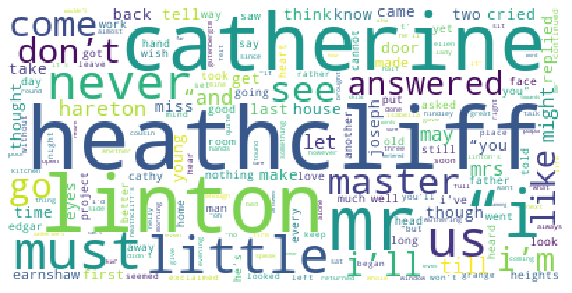

In [ ]:
#getting data
text = get_text('https://www.gutenberg.org/files/768/768-0.txt')

#plotting Word Cloud
word_cloud(text)

---

Can you guess the book? :)

---